# Editing worksheets

Here we give an overview of how to edit worksheets. More info can be found in [Tests notebook](tests.ipynb)



## Common files

There are a bunch of files common to all worksheets and possibly website 

_You do not need to change them (except maybe_ `my_lib.py`_)_

|File|Description|Jupyter|Website|Student zips|
|----|-----------|-------|-------|------------|
|[jupman_tools.py](https://github.com/DavidLeoni/jupman/blob/master/jupman_tools.py)|back end stuff   |X|-| |
|[jupman.py](https://github.com/DavidLeoni/jupman/blob/master/jupman.py)|utilities for worksheets     |X|-|X|
|[my_lib.py](https://github.com/DavidLeoni/jupman/blob/master/jupman.py)|custom utilities example     |X|-|X|
|[_static/js/jupman.js](https://github.com/DavidLeoni/jupman/blob/master/_static/js/jupman.js)|Javascript code                                                                                                             |X|X|X|
|[_static/css/jupman.css](https://github.com/DavidLeoni/jupman/blob/master/_static/css/jupman.css)|CSS|X|X|X|
|[_static/css/jupman-web.css](https://github.com/DavidLeoni/jupman/blob/master/_static/css/jupman-web.css)|CSS||X| |


## Running Jupyter

First of all, run Jupyter from the root directory:


```bash
    jupyter notebook
```


## Source code for chapters

Put chapters one per folder, in the root. Any folder which doesn't start with underscore `_`  or `exam/` will be considered a chapter.

During build, each chapter gets automatically zipped and zip goes to `_static/generated`. So for example, `python-example/` produces a zip called `_static/generated/python-example.zip`, which will have these contents:

```


python-example
    _static
       js
          jupman.js
          toc.js
       css
          jupman.css
       img
          cc-by.png
    python-example.ipynb         
    lab.py      
    lab_test.py
    lab_sol.py
    jupman.py
    my_lib.py
```


The zip folder structure will be a merge of chapter files and files shared by all chapters which are specified in  `exercises_common_files` variable in [conf.py](../conf.py). Since the root in the zip becomes the chapter itself, jupman will process `.py` and `.ipynb` files for fixing eventual relative imports. Markdown, HTML and CSS links in ipynb will also be adjusted.

Exercise files can be automatically generated from solutions, as we will see next.


## Exercise types

There are four types of exercises: 

1. Python files
2. Jupyter files
3. mixed Jupyter and Python exercises

You can automatically generate an exercise from a solution file by stripping text marked with special tags. You can inspect generated files in `_build/jupman/` directory

On the website, students will be able to see solutions by clicking on appropriate buttons.

In the zips to download, two versions of files will provided, one without solution and one with solutions (in exam modality of course no solution will be shipped)

### Exercises in Python files

See [python-example/python-example.ipynb](../python-example/python-example.ipynb)


In this type of exercises, you typically have a Jupyter file (like `python-example.ipynb`) that describes the exercise and then the actual exercises are in Python files. 


If there is a solution file `FILE_sol.py` ending in `_sol.py` but no corresponding exercise file `FILE.py` without the `_sol`: 

then Jupman will try to generate `FILE.py` one from `FILE_sol.py`. To do so, it will look for tags to strip inside the solution file.

If there is already an exercise file like this: 

* `python_intro.py`
* `python_intro_sol.py`

Jupman will just copy the existing file.

### Exercises in Jupyter files

See example: [jupyter-example/jupyter-example-sol.ipynb](../jupyter-example/jupyter-example-sol.ipynb)

This type of exercises stay in a Jupyter notebook itself.

If there is a notebook ending in `-sol.ipynb`, the following applies (**WARNING**: for `ipynb` files we use dash `-`, _not_ the underscore `_`):

- the notebook must contain tags to strip
- exercises derived will have 'EXERCISES' appended to the title (the word can be customized in `conf.py` - you might need to translate it)

### Exercises both in Jupyter and Python files

See [jup-and-py-example/jup-and-py-example-sol.ipynb](../jup-and-py-example/jup-and-py-example-sol.ipynb)

### Challenges

<div class="alert alert-warning">
    
This is an experimental feature, current implementation is subject to change.
   
</div>

Challenges are solutions which remain unpublished and from which exercises are generated **in the same original older** where the solution resides (not only in the zip!). Challenge files  can be both Jupyter notebooks or Python files, ending in `-chal-sol.ipynb` or `_chal_sol.py`.  

The idea is that challenges solutions are gitignored, and exercises are manually generated by  calling `jupman.generate_exercise()` inside a Jupyter notebook like this:

```python
#jupman-purge
import sys; sys.path.append('../'); from conf import jm;
jm.generate_exercise('great_chal_sol.py')
#/jupman-purge
```

It is a bit laborious but the idea is that typically you will also want to  run and see tests results in Jupyter notebook so you can do it in the same final cell, which you will also probably want to set in cell metadata `"nbsphinx":"hidden"`

* the solution notebook must contain tags to strip and have SOLUTIONS at the end of the title  (the word can be customized in `conf.py` - you might need to translate it)

## File filtering

You would think setting which files to ignore is an easy topic: alas, it is not. 

There are multiple ways to filter files:

1. `.gitignore`
2. Sphinx  [exclude_patterns](https://www.sphinx-doc.org/en/master/usage/configuration.html#confval-exclude_patterns) / [include_patterns](https://www.sphinx-doc.org/en/master/usage/configuration.html#confval-include_patterns) (excludes take priority over includes)
3. jupman `zip_ignore` property

Since Sphinx doesn't recognize `.gitignore` files (as of December 2023) which leads to configuration duplication, to streamline handling by calling `jupman_tools.init_exclude_patterns` in `conf.py` you can load `.gitignore` content into Sphinx param `exclude_patterns`. 

![File filtering](img/file-filtering.svg)

NOTE: this is not an actual Venn diagram, it only tries to give the idea.


**A typical example**

|local source        | published source     | published html     | published zip       | notes       |
|--------------------|----------------------|--------------------|---------------------|-------------|
|tutorial.ipynb      | tutorial.ipynb       | tutorial.html      | tutorial.ipynb      |             |             
|tutorial-sol.ipynb  | tutorial-sol.ipynb   | tutorial-sol.html  | tutorial-sol.ipynb  |             |
|tutorial-chal-sol.ipynb|tutorial-chal.ipynb| tutorial-chal.html | tutorial-chal.ipynb |             |
|prep/raw_data.csv   |                      |                    | | |
|prep/raw_script.csv |                      |                    | | |
|img/pic.jpg         | _moved by sphinx_    | img/pic.jpg        | img/pic.jpg         |             |
|vid/big-video.mpg   | _moved by sphinx_    | vid/big-video.mpg  |                     |             |
|small-dataset.csv   | small-dataset.csv    | small-dataset.csv  | small-dataset.csv   |             |   
|big-dataset.csv     | big-dataset.csv      | big-dataset.csv    |                     |             |
|small-output.json   | small-output.json    | small-output.json  |                     |             |
|big-output.json     | big-output.json      | big-output.json    |                     |             |
|small-expected-output.json| small-expected-output.json    | small-expected-output.json  | small-expected-output.json   |           |
|big-expected-output.json  | big-expected-output.json    | big-expected-output.json  | |             |

**Output handling**

When a solution creates some output file, to prevent confusion it's best to _show_ in the tutorial the creation of a file like `output.json` and in the solution actually create a file `expected_output.json` with  code marked with `jupman-purge`. This way the student will hopefully write code which creates `output.json` without overwriting the existing `expected-output.json` which can he can then use for testing and comparison. 

**Caveats**

- as of Jupman 3.6, negative patterns in `.gitignore` are not currently longer supported (a limitation due to [igittigitt](https://github.com/bitranox/igittigitt) lib we use to load .gitignore file)
- notice `.gitignore` allows patterns beginning with `/` but sphinx doesn't - the loader takes care of eliminating the initial slash


## Solution tags

Presence of these tags marks a cell as a solution.

Start tags begin with a `#` while end tags begin with a `#\`

### jupman-raise

Replaces code inside with an Exception (text is customizable in `conf.py`). Be careful to position the comment exactly with the indentation yuoi want the raise to appear. For example:

```python

def add(x,y):   
    #jupman-raise
    return x + y
    #/jupman-raise

```

becomes

```python

def add(x,y):   
    raise Exception('TODO IMPLEMENT ME !')

```



### jupman-strip

Just strips code inside exercises

```python
def f(x):
    print(x)
    
#jupman-strip
def help_func(x,y):
    return x - y
#/jupman-strip

def g(y):
    return y
```

becomes

```python
def f(x):
    print(x)

def g(y):
    return y
    
```



### write here

This special tag for python code erases whatever is found afterwards the `# write here` **line**

* you can put how many spaces you want in the comment
* phrase can be customized in `conf.py`

```python

w = 5

#  write  here  fast please

x = 5 + w
y = 2 + x
```

becomes

```python

w = 5

#  write  here  fast please


```


### SOLUTION

In a code cell, if you put `# SOLUTION` at the beginning the whole cell cell content gets deleted (`# SOLUTION` string included).

* Word can be customized in `conf.py`


```
# SOLUTION

def f():
    print('hello')
```

becomes nothing:


### QUESTION - ANSWER

In a markdown cell, everything in a cell with `**ANSWER**:` inside will be stripped. 

* Markdown can be customized in `conf.py`

**QUESTION**: Describe why iPhone n+1 is better than iPhone n

<b>ANSWER</b>: it costs more

Becomes:

**QUESTION**: Describe why iPhone n+1 is better than iPhone n

## Directive tags

Some tags change the preprocessor behaviour. They are applied before solution tags.

### jupman-purge

Eliminate content both from exercises AND solutions. Can be helpful when you have code which creates expected output, like images or python data - the idea is to completely remove code so so students don't accidentally copy-paste it or uncomment it.

* `jupman-purge-input`: purges only cell source
* `jupman-purge-output`: purges only cell output
* `jupman-purge-io` : purges both input and output

`jupman-purge` purges only a span:

```python
x=5
#jupman-purge
plt.savefig('expected_image.png')
jupman.save_py('expected_output_db.py', ['big', 'data', 'structure']*1000)    
#/jupman-purge
x=6
```
becomes

```python
x=5
x=6
```

### jupman-preprocess

By default  only notebooks solutions (ending in `-sol.ipynb`) are preprocessed before  html conversion begins.  If you want to force preprocessing on a particular non-solution notebook, add this in the first cell:

```python
#jupman-preprocess
```

## Hiding cells

A way to hide cells (like for example the `import jupman` code) is by clicking `View->Cell toolbar -> Edit metadata` and adding `"nbsphinx": "hidden"` to the JSON (see also original [NBSphinx docs](
https://nbsphinx.readthedocs.io/en/0.2.14/hidden-cells.html#Hidden-Cells
) and [Togglable cells in Jupman tests](tests.ipynb#Togglable-cells) ).

**NOTE 1**: As of NBSphinx 2.17, it is not possible to hide only cell text but not the output.

## Info boxes


Supported boxes are inherited from NBSphinx with `div` classes `"alert alert-info"`,  `"alert alert-warning"`

See [Rendering tests](http://127.0.0.1:8888/notebooks/jupman/jupman-3.5.1/manual/tests.ipynb#Info/Warning-Boxes) for examples.

Plus we add `jupman-alert-principle`: some alerts to be often reminded can be preceded with an empty `div` having class `jupman-alert-principle` followed by a regular alert box, so they will display as you want on the website and as fallback boxes in the pdf (did this way as we can't add classes nor other attributes, tried also `data-jupman` html attributes with no success)

**NOTE**: default colors are indicative and minimal on purpose, for a better view see [softpython themed version](https://jupman.softpython.org/themed/manual/tests.html#jupman-alert-principle)

**Recommended approach**: The typical principle alert should be brief and may have a link to more substantial text, with a short line under it.  If you need more explicative text, put it outside:

```html
<div class="jupman-alert-principle"></div>
<div class="alert alert-info">

[IV PRINCIPLE](https://jupman.softpython.org/principles.html#V-PRINCIPLE): **You shall write tests!**
    
Who does **not** writes tests, falls into _Debugging Hell_!
</div>                 
```

<div class="jupman-alert-principle"></div>
<div class="alert alert-info">

[IV PRINCIPLE](https://jupman.softpython.org/principles.html#IV-PRINCIPLE): **You shall write tests!**

Who does **not** writes tests, falls into _Debugging Hell_! 
</div>

## Utilities  


**NOTE**: not mandatory, it's mostly intended to tweak notebooks downloaded locally. Should be avoided in notebooks meant for students, as it's more likely it will mess their configurations - also, they might copy the notebooks without knowing they contain the custom js and use weird extensions which could generate conflicts (such as double toc)

For notebooks in the root folder:

```python
import jupman
```
Worksheets in in subfolders can use `sys.path` to locate the module

```python
import sys
sys.path.append('../')
import jupman
```
Some reason for this ugliness is reported in [this issue](https://github.com/DavidLeoni/jupman/issues/12).

## Launch unit tests

Inside worksheets you can run `unittest` tests. 

To run all the tests of a test class, write like this

```python
jupman.run(NameOfTheTestClass)
```

To run a single method, write like this:

```python
jupman.run(NameOfTheTestClass.nameOfTheMethod)
```


## Python Tutor

Among the various ways to embed Python Tutor, we decided to implement a special `jupman.pytut()` method. First you need to import the jupman module:

In [1]:
import sys
sys.path.append('../')
import jupman

Then you can put a call to `jupman.pytut()` at the end of a cell, and the cell code will magically appear in python tutor in the output (except the call to `pytut()` of course). To see Python Tutor you don't need to be online

In [2]:
x = [5,8,4]
y= {3:9}
z = [x]

jupman.pytut()


Beware of variables which were initialized in previous cells, they won't be available in Python Tutor and you will get an error:

In [3]:
w = 8


In [4]:
x =  w + 5
jupman.pytut()

Traceback (most recent call last):
  File "../jupman.py", line 2453, in _runscript
    self.run(script_str, user_globals, user_globals)
  File "/usr/lib/python3.7/bdb.py", line 578, in run
    exec(cmd, globals, locals)
  File "<string>", line 2, in <module>
NameError: name 'w' is not defined


## Pandas

Correctly rendering pandas in PDFs is not so easy ([see issue](https://github.com/DavidLeoni/jupman/issues/69)), so far we created this little function which sometimes is handy:

In [5]:
import pandas as pd 
    

lista = [['Rosanna', 'Gippalanda', 26, 100, 500, 300, 600, 600, 100, 300, 600, 300, 200, 400, 200, 300, 400, 500],
         ['Matilda', 'Zampola',    10, 500, 200, 300, 500, 400, 300, 200, 500, 300, 200, 400, 200, 300, 400, 500],
         ['Mario', 'Cipolli',      25, 300, 500, 100, 500, 300, 500, 100, 500, 300, 200, 400, 200, 300, 400, 500], 
         ['Ugo', 'Sgarapirri',     30, 100, 400, 200, 500, 300, 200, 600, 300, 300, 200, 400, 200, 300, 400, 500]
        ]
                  
df = pd.DataFrame(lista, columns =['Name', 'Surname', 'Age', *['Par'+str(i) for i in range(1,16)]])
df # web

,Name,Surname,Age,Par1,Par2,Par3,Par4,Par5,Par6,Par7,Par8,Par9,Par10,Par11,Par12,Par13,Par14,Par15
0,Rosanna,Gippalanda,26,100,500,300,600,600,100,300,600,300,200,400,200,300,400,500
1,Matilda,Zampola,10,500,200,300,500,400,300,200,500,300,200,400,200,300,400,500
2,Mario,Cipolli,25,300,500,100,500,300,500,100,500,300,200,400,200,300,400,500
3,Ugo,Sgarapirri,30,100,400,200,500,300,200,600,300,300,200,400,200,300,400,500


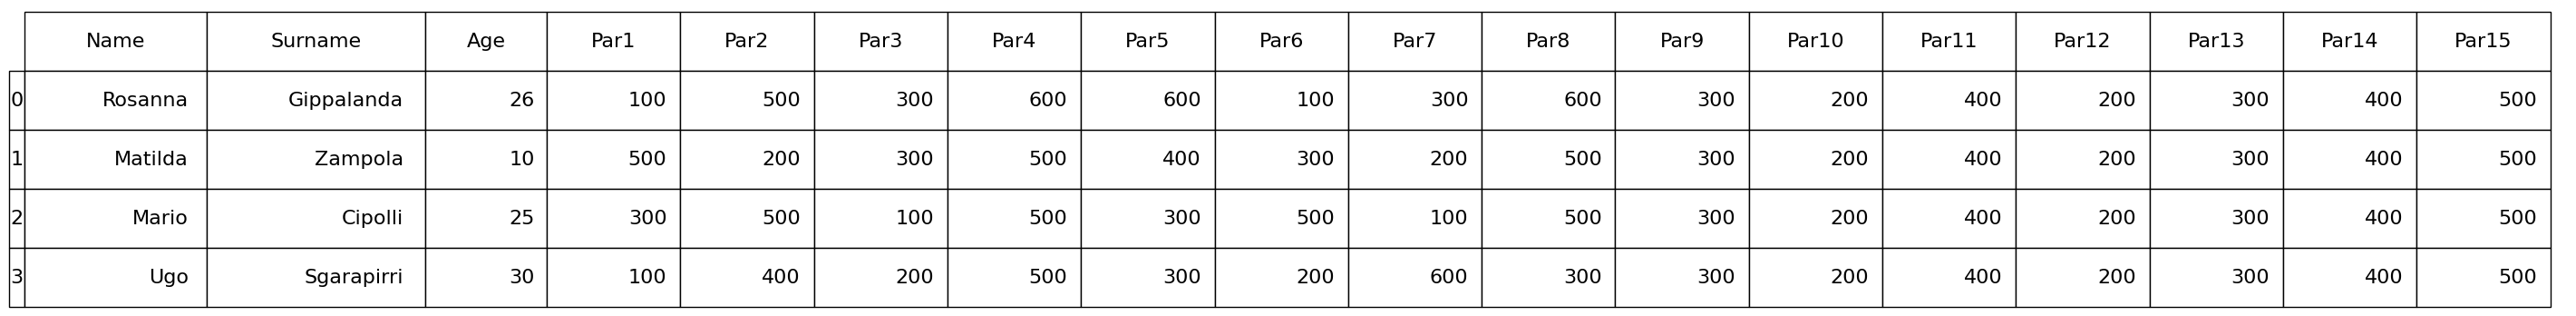

In [6]:
import jupman
jupman.draw_df(df)  # image for pdf

## Showing function help

Python help is already quite good, but adds two useless extra lines and only works as a print, so we defined `jupman.get_doc`:

In [7]:
print(jupman.get_doc(jupman.get_doc))

def get_doc(fun):
    """ Returns the help of a function formatted in a faithful manner
        
        @since 3.3
    """


## Custom js and css


If you need custom js and/or css in a notebook, you can inject it by running

```python
jupman.init()
```

in the first cell, it will inject `jupman.js` and `jupman.css`

## Show table of contents

Since 0.8, custom toc is disabled, try instead [installing toc2 extension](quickstart.ipynb#Optional---Install-Jupyter-contrib-extensions). If you still want the jupman toc (not recommended), execute 

```python
jupman.init(toc=True)
```

it will create the sidebar even when editing in Jupyter. To refresh the sidebar, just rerun  the cell.

Note: hiding the `jupman.init` code cell will prevent the build system to embed the Javascript file `jupman.js` inside the page in the HTML website: this is still fine as it is fetched separately by settings in `conf.py`.